<a href="https://colab.research.google.com/github/OluwajobaOluwabori/NLP--Predicting-play-store-reviews/blob/main/Predicting_play_store_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 use this dataset as a test dataset, after downloading the playstore dataset as a training dataset
2 Use this data solely 

In [34]:
#Installing neccessary libraries
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
# from google_play_scraper import app

# result = app(
#     'com.streettagapp',
#     lang='en', # defaults to 'en'
#     country='uk' # defaults to 'us'
# )
# #com.mintgames.triplecrush.tile.fun
# result["comments"]

In [36]:
# from google_play_scraper import app

# result = app(
#     'com.mintgames.triplecrush.tile.fun',
#     lang='en', # defaults to 'en'
#     country='uk' # defaults to 'us'
# )
# result["comments"]

In [37]:
# from google_play_scraper import Sort, reviews

# result, continuation_token = reviews('com.mintgames.triplecrush.tile.fun',
#     #'com.streettagapp',
#     lang='en', # defaults to 'en'
#     country='us', # defaults to 'us'
#     sort=Sort.NEWEST, # defaults to Sort.NEWEST
#     count=150  # defaults to 100
    
#    # filter_score_with=5 # defaults to None(means all score)
# )

# # If you pass `continuation_token` as an argument to the reviews function at this point,
# # it will crawl the items after 3 review items.

# # result,_ = reviews_all(
# #     'com.streettagapp',
# #     continuation_token=continuation_token # defaults to None(load from the beginning)
# # )
# print(result)

In [38]:

# res ={key: value for items in result for key,value in items.items()}
# print(str(res))
# res["content"]

In [39]:
#len(res["content"])

In [40]:
from google_play_scraper import Sort, reviews_all

result = reviews_all('com.streettagapp',
                     #'com.mintgames.triplecrush.tile.fun',
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST # defaults to Sort.MOST_RELEVANT
   # filter_score_with=5 # defaults to None(means all score)
)

res ={key: value for items in result for key,value in items.items()}
print(str(res))

{'reviewId': 'f49e2740-72e3-44a1-a518-d5cbf8c09cfd', 'userName': 'A Google user', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'content': 'An app rewarding for walks.Sounds amazing!!! User friendly and easy to navigate through it. loved the start up videos and oath! highly recommended 😊', 'score': 5, 'thumbsUpCount': 7, 'reviewCreatedVersion': '1.1.5', 'at': datetime.datetime(2019, 5, 11, 6, 14, 8), 'replyContent': None, 'repliedAt': None}


In [41]:
result

[{'at': datetime.datetime(2022, 6, 18, 15, 7, 34),
  'content': 'I am using this on my android phone I wanted to get it on my lap top...but there doesnt seem to be a way to do it...???',
  'repliedAt': None,
  'replyContent': None,
  'reviewCreatedVersion': '1.1.67',
  'reviewId': 'fcec97a1-62b0-46d1-9016-295b45e1d62a',
  'score': 4,
  'thumbsUpCount': 0,
  'userImage': 'https://play-lh.googleusercontent.com/a-/AOh14GjOKf4avjRqkzLQ9puqhBNAAPePOIF_xlMoYqla',
  'userName': 'Michael Robert'},
 {'at': datetime.datetime(2022, 6, 5, 13, 37, 25),
  'content': 'Customer support can improve substantially. Also FAQs have no info on how to create or collect polytags.',
  'repliedAt': None,
  'replyContent': None,
  'reviewCreatedVersion': '1.1.67',
  'reviewId': '01c369f0-77b3-4b60-8b41-14e742bfcb4e',
  'score': 3,
  'thumbsUpCount': 0,
  'userImage': 'https://play-lh.googleusercontent.com/a/AATXAJyXcac0ErKuu-1QieHJ1avQvNuUa61B50eGEaGj=mo',
  'userName': 'I S'},
 {'at': datetime.datetime(2022, 5,

In [42]:
# Save app reviews in a CSV format
import pandas as pd
df=pd.DataFrame(result)
#df.to_csv('reviews.csv', index=None, header=True)



In [43]:
df=df[['score','content']]
#Checking gor null values
df.isnull().any()
df

,score,content
0,4,I am using this on my android phone I wanted t...
1,3,Customer support can improve substantially. Al...
2,2,Needs to incorporate samsung health for the st...
3,4,When is samsung health steps syncing coming. I...
4,5,This app has helped me regain my consciousness...
...,...,...
113,5,S.T has encouraged my kids and I to get out to...
114,5,amazing
115,5,how do you get a referal code??
116,1,A ton of questions about my fitness then tells...


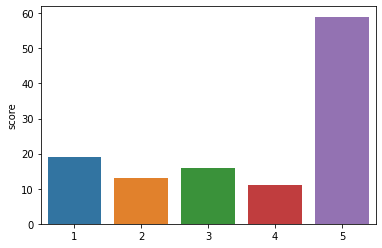

In [44]:
import seaborn as sns
sns.barplot(x=df.score.value_counts().index,y=df.score.value_counts())

In [45]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df['scores']= df['content'].apply(lambda content: sid.polarity_scores(content))
df['compound']= df['scores'].apply(lambda score_dict:score_dict['compound'])



In [47]:
#df['comp_score']= df['compound'].apply(lambda comp: 'pos' if comp > 0  else ('neg' if comp < 0  else 'neu' ))
#df['comp_score']= df[['compound','score']].apply(lambda comp,score: 'pos' if comp > 0 and score > 2 else ('neg' if comp < 0 and score <3  else 'neu' ))


In [62]:
df['comp_score']=''
df.loc[(df["compound"] >0) & (df['score'] > 2), "comp_score"] = 1
df.loc[(df["compound"] <0) & (df['score'] < 3), "comp_score"] = 0
df.loc[(df["compound"] == 0 ) , "comp_score"] = 2

df['comp_score']=df['comp_score'].replace('', 2)


In [49]:
df['comp_score'].value_counts()

pos    74
neu    32
neg    12
Name: comp_score, dtype: int64

In [50]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [63]:
sentences = df['content'].tolist()

In [65]:
import tensorflow_datasets as tfds

vocab_size = 1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, max_subword_length=6)

In [66]:
# Check that the tokenizer works appropriately
num = 5
print(sentences[num])
encoded = tokenizer.encode(sentences[num])
print(encoded)
# Separately print out each subword, decoded
for i in encoded:
  print(tokenizer.decode([i]))

App easy to use but always closes on own and has to be open on it so that it can be used. Nothing else can be open at the same time eg music
[220, 198, 2, 117, 16, 142, 720, 608, 6, 19, 469, 4, 48, 2, 43, 60, 19, 5, 72, 57, 5, 65, 43, 368, 788, 1, 654, 391, 307, 73, 65, 43, 60, 112, 3, 429, 720, 101, 789, 14, 492, 135]
App 
easy 
to 
use 
but 
always
 
close
s 
on 
own 
and 
has 
to 
be 
open 
on 
it 
so 
that 
it 
can 
be 
use
d
. 
No
thing 
el
se 
can 
be 
open 
at 
the 
same
 
time 
e
g 
mus
ic


In [22]:
# Text Processing Library 
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from textblob import TextBlob
from wordcloud import WordCloud
# Create a word cloud function 
def create_wordcloud(text, image_path = None):
    '''
    Pass a string to the function and output a word cloud
    
    text: The text for wordcloud
    image_path (optional): The image mask with a white background (default None)
    
    '''
    if image_path == None:
        # Generate the word cloud
        wordcloud = WordCloud(width = 600, height = 600, 
                    background_color ='white', 
                    stopwords = STOPWORDS, 
                    min_font_size = 10).generate(text) 
    
    else:
        mask = np.array(Image.open(image_path))
        wordcloud = WordCloud(width = 600, height = 600, 
                    background_color ='white', 
                    stopwords = STOPWORDS,
                    mask=mask,
                    min_font_size = 5).generate(text) 
    
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation = 'nearest') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

In [23]:
# Data Visualisation 
import matplotlib.pyplot as plt 
import numpy as np

# NLTK Downloads
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
STOPWORDS = stopwords.words('english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [24]:
# Remove Stopwords and Lemmatise the data

# lemmatizer = WordNetLemmatizer()
# text = [lemmatizer.lemmatize(word) for sentence in sentences for word in sentence.split() if word not in STOPWORDS]
# text = ' '.join(text)

  


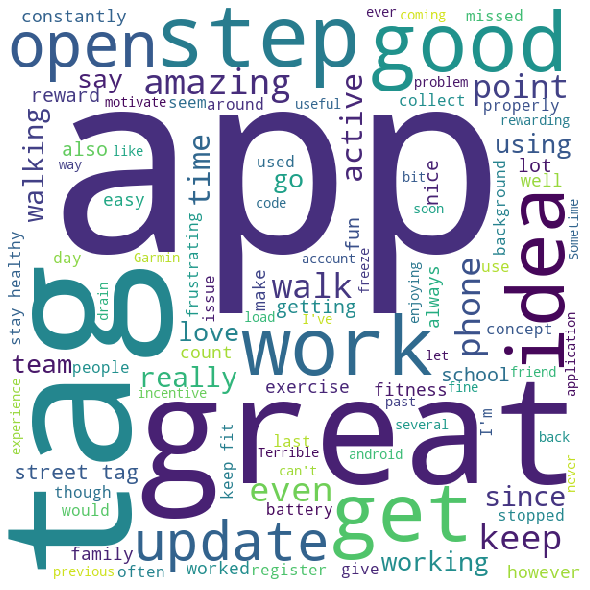

In [25]:
# create_wordcloud(text)

In [26]:
text

"I using android phone I wanted get lap top...but doesnt seem way it...??? Customer support improve substantially. Also FAQs info create collect polytags. Needs incorporate samsung health stress When samsung health step syncing coming. It say coming soon said 2 year This app helped regain consciousness physically active also rewarding same... 👍 App easy use always close open used. Nothing else open time eg music Why section redeem reward ..?!! We collect point get paid, point ??? It work well poly tag cycling go back touching phone plastic phone covering Very good app easy follow download Not working since update! people Awful pedometer rarely register step , let hook Garmin, I change password since say Garmin linked another account. The tag register either. After running 5miles walking 2 register 137 step . Great app, keep family active It's ok app, kid love watching step progress, never work properly. The power hour never register tag get, even though hour nominated since asked updat

In [67]:

labels = df['comp_score'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [68]:
testing_sentences

['Absolutely brilliant idea. This is really encouraging me to get out and exercise. App works well. Highly recommended.',
 'Nice very interesting App Please use my referal Code : sumukha',
 "Won't open today.",
 'Very active.',
 'Good',
 'It is very useful. I am doing exercise through this app and also getting points easily.',
 "It's a interesting app to get you moving.",
 'We are in quarantine so shut up',
 "This app needs a lot of work! It lags and doesn't always acknowledge the tags. Worse when you play it in the background as you get a false sense of security and you think you are walking past tags and you haven't. It does however give you a warning that your battery will drain. You can not feed back anything back cos the chat does not work. If it wasn't because of the school incentive then I would delete this app. It does not make me walk further. Just a battery draining step monitor.",
 'Good',
 'I am first user of street tag walk and reward i gives free gift',
 'Amazing App. Mak

In [98]:
vocab_size = 604 #1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [99]:
padded

array([[  7, 163,  55, ...,   0,   0,   0],
       [258, 259,  48, ...,   0,   0,   0],
       [267,   4, 268, ...,   0,   0,   0],
       ...,
       [ 15,   5,   4, ...,   0,   0,   0],
       [ 23,   5,   8, ...,   0,   0,   0],
       [255,   6, 136, ...,   0,   0,   0]], dtype=int32)

## Review a Sequence

Let's quickly take a look at one of the padded sequences to ensure everything above worked appropriately.


In [100]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])

when is samsung health steps syncing coming it says coming soon but has said that for about 2 years ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
When is samsung health steps syncing coming. It says coming soon but has said that for about 2 years


## Train a Basic Sentiment Model with Embeddings


In [101]:
# Build a basic sentiment network
# Note the embedding layer is first, 
# and the output is only 1 node as it is either 0 or 1 (negative or positive)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 16)           9664      
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 6)                 9606      
                                                                 
 dense_15 (Dense)            (None, 3)                 21        
                                                                 
Total params: 19,291
Trainable params: 19,291
Non-trainable params: 0
_________________________________________________________________


In [102]:
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
3/3 [==============================] - 1s 81ms/step - loss: 7.9042 - accuracy: 0.5106 - val_loss: 3.5530 - val_accuracy: 0.7500
Epoch 2/10
3/3 [==============================] - 0s 15ms/step - loss: 3.5825 - accuracy: 0.4149 - val_loss: 2.4294 - val_accuracy: 0.2500
Epoch 3/10
3/3 [==============================] - 0s 16ms/step - loss: 2.5584 - accuracy: 0.2979 - val_loss: 2.0108 - val_accuracy: 0.1667
Epoch 4/10
3/3 [==============================] - 0s 24ms/step - loss: 2.1644 - accuracy: 0.2979 - val_loss: 1.7309 - val_accuracy: 0.1667
Epoch 5/10
3/3 [==============================] - 0s 16ms/step - loss: 1.8832 - accuracy: 0.2979 - val_loss: 1.5153 - val_accuracy: 0.1667
Epoch 6/10
3/3 [==============================] - 0s 17ms/step - loss: 1.6691 - accuracy: 0.2979 - val_loss: 1.3354 - val_accuracy: 0.1667
Epoch 7/10
3/3 [==============================] - 0s 15ms/step - loss: 1.4884 - accuracy: 0.2979 - val_loss: 1.1779 - val_accuracy: 0.1667
Epoch 8/10
3/3 [===========

## Get files for visualizing the network


In [103]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(604, 16)


In [106]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
reverse_word_index